## Importing the scripts with necessary functions and other libraries

In [1]:
from scripts import geoprocessing, data_processing, plotting
import pandas as pd
import geopandas as gpd
import xarray
import warnings
import os
warnings.filterwarnings('ignore')

tree_path = "data/SouthAmerica_TreeCover_Mattos2023.nc"
elev_path = "data/SouthAmerica_Elevation_Mattos2023.nc"
pp_path = "data/SouthAmerica_Precipitation_Mattos2023.nc"
count_path = "data/SouthAmerica_TreeCount_Mattos2023.nc"
sev_path = "data/SouthAmerica_SEV_Mattos2023.nc"

## Read the data

In [2]:
df = pd.read_parquet("data/data_mattos2023_pnas_1.parquet")

In [3]:
df

,TC,WL_SEV,DR_SEV,AREA,MAP,LAT,LON,CLASS,DSI,DS_CLASS
0,72.881920,0.0,12.0,826871.393498,815.621338,14.870833,-61.187500,Forest,0.000000,1
1,53.598766,0.0,12.0,826871.393498,815.621338,14.870833,-61.179165,Savanna,0.000000,1
2,65.188889,0.0,12.0,826871.393498,815.621338,14.870833,-61.162498,Forest,0.000000,1
3,40.501541,0.0,12.0,826871.393498,815.621338,14.870833,-61.154167,Savanna,0.000000,1
4,69.962036,0.0,2.0,826902.519418,815.621338,14.862500,-61.212502,Forest,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
9638631,14.464038,1.0,4.0,703317.253620,985.469849,-34.995834,-57.629166,Savanna,1.600000,2
9638632,14.524288,1.0,5.0,703317.253620,985.469849,-34.995834,-57.620834,Savanna,1.666667,2
9638633,11.960126,1.0,8.0,703317.253620,985.469849,-34.995834,-57.612499,Savanna,1.777778,2
9638634,14.642199,1.0,8.0,703317.253620,995.631897,-34.995834,-57.604168,Savanna,1.777778,2


## Figure 1

### Tree Cover - Rainfall Histogram

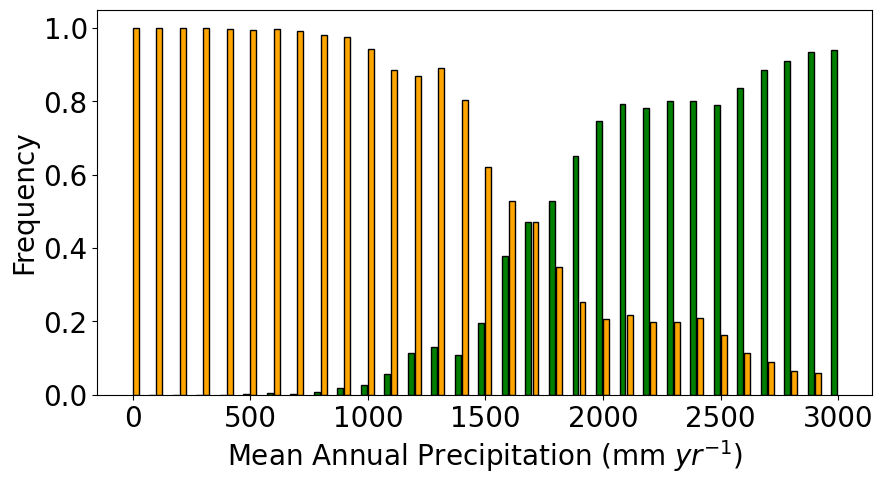

In [4]:
plotting.plot_treecover_rainfall_histogram(df)

### Distribution of tree cover for several drainage-climate classes


MAP Class: Dry, MAP thresholds: None - 1400
In class 1, forest is 5.7, and savanna is 94.3
In class 2, forest is 5.2, and savanna is 94.8
In class 3, forest is 9.9, and savanna is 90.1

MAP Class: Intermediate, MAP thresholds: 1400 - 1800
In class 1, forest is 50.4, and savanna is 49.6
In class 2, forest is 23.6, and savanna is 76.4
In class 3, forest is 50.1, and savanna is 49.9

MAP Class: Wet, MAP thresholds: 1800 - None
In class 1, forest is 87.5, and savanna is 12.5
In class 2, forest is 68.5, and savanna is 31.5
In class 3, forest is 84.9, and savanna is 15.1


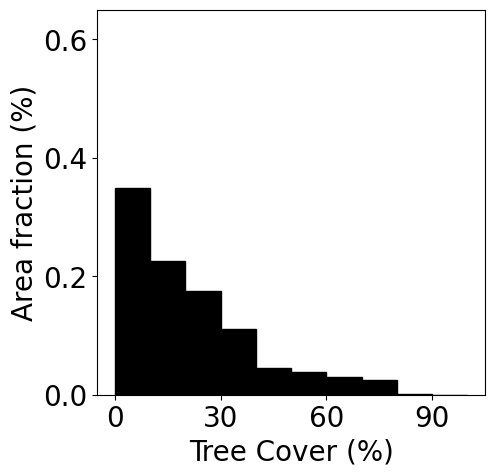

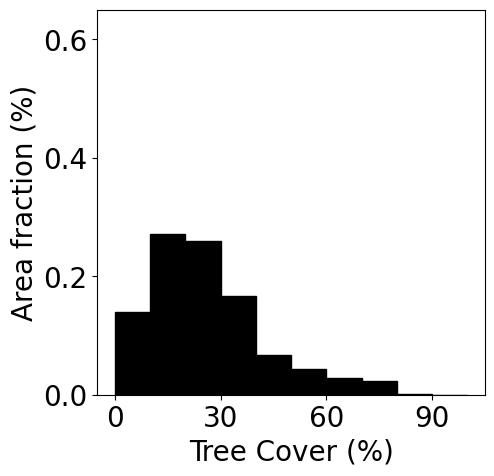

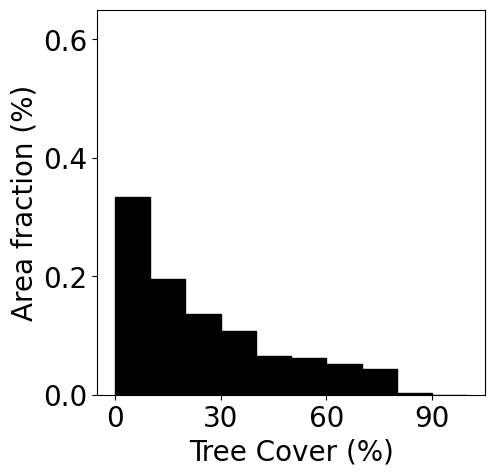

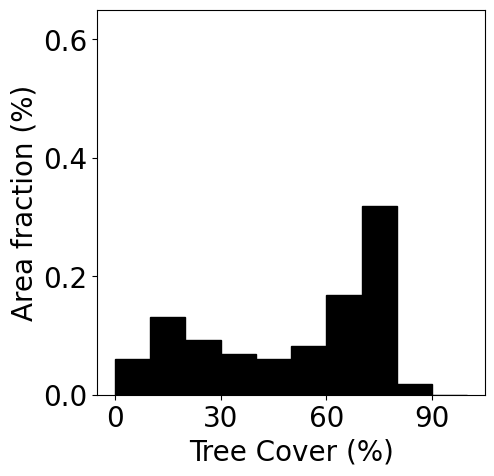

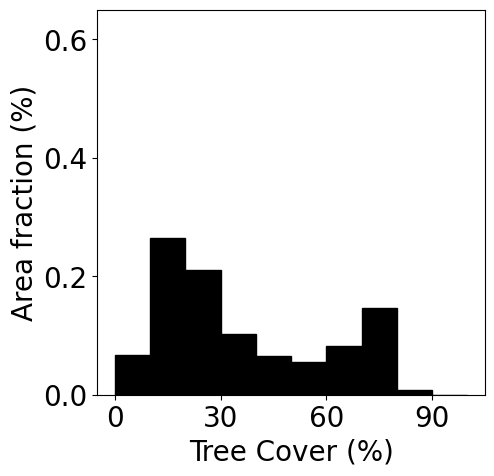

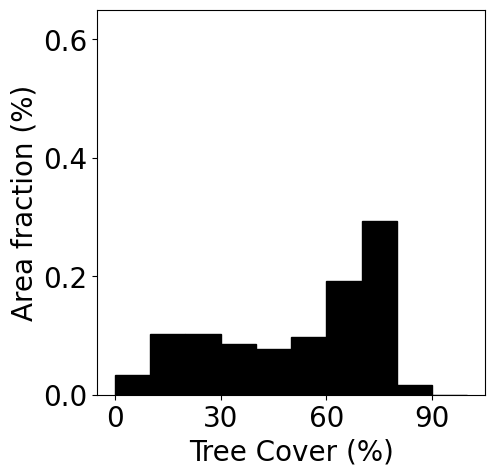

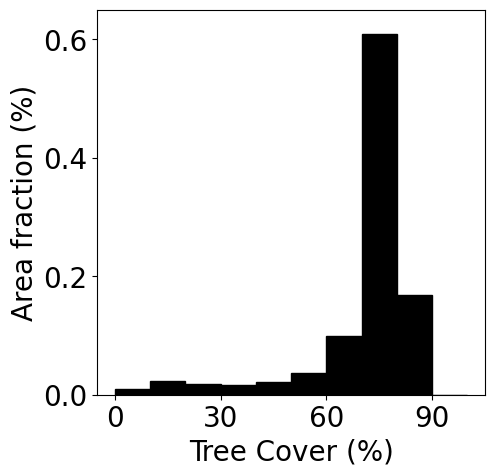

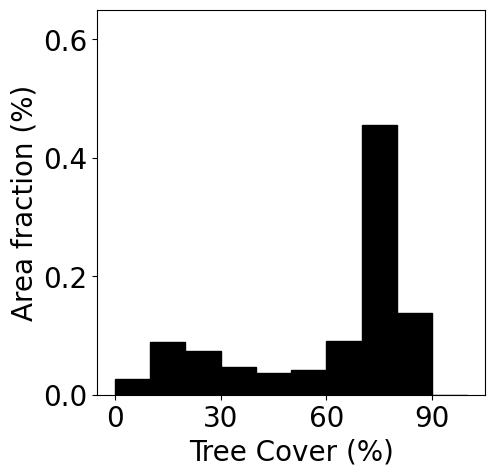

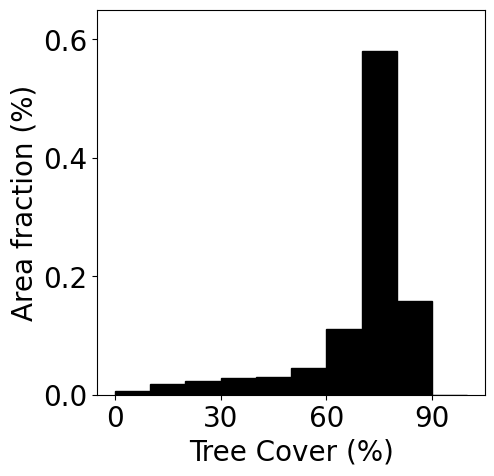

In [5]:
plotting.plot_topoclimate_hists(df)

## Figure 2

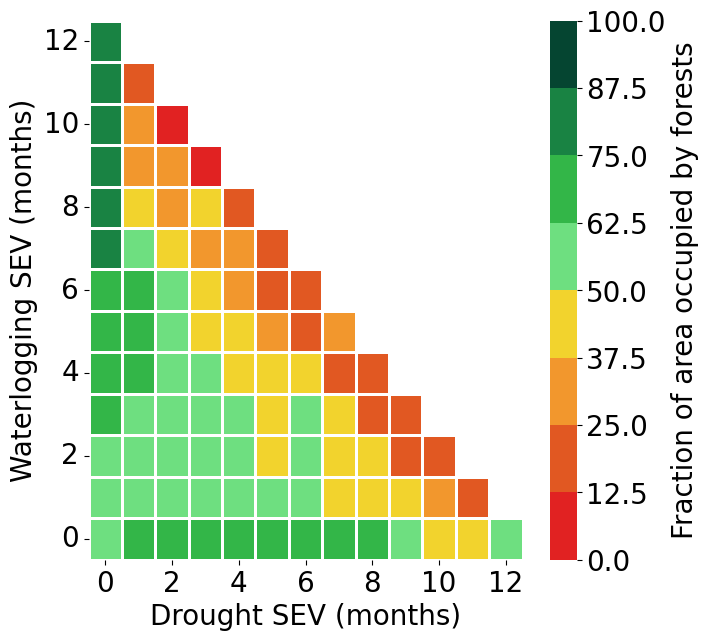

In [6]:
plotting.plot_doublestress_2d(df)

In [7]:
wl_list = [11,10,]
dr_list = [1,1]

In [8]:
sev_path = "data/SouthAmerica_SEV_Mattos2023.nc"
ds = data_processing.raster_dsi_class(sev_path)

In [9]:
ds

<xarray.Dataset>
Dimensions:      (lat: 8520, lon: 7320)
Coordinates:
  * lat          (lat) float32 -56.0 -55.99 -55.98 -55.97 ... 14.98 14.99 15.0
  * lon          (lon) float32 -93.0 -92.99 -92.98 ... -32.02 -32.01 -32.0
Data variables:
    dsi_classes  (lat, lon) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1

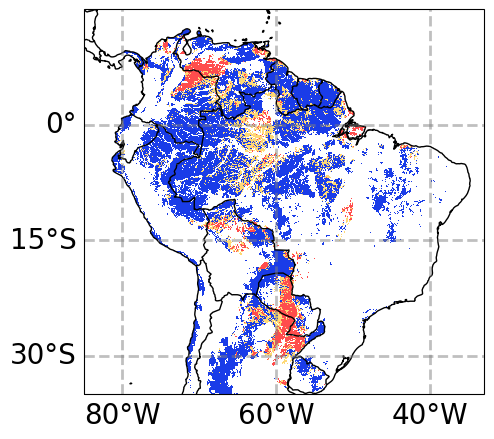

In [10]:
tree_path = "data/SouthAmerica_TreeCover_Mattos2023.nc"
elev_path = "data/SouthAmerica_Elevation_Mattos2023.nc"
pp_path = "data/SouthAmerica_Precipitation_Mattos2023.nc"
count_path = "data/SouthAmerica_TreeCount_Mattos2023.nc"
sev_path = "data/SouthAmerica_SEV_Mattos2023.nc"

plotting.plot_dsi_map(
    ds,
    "dsi_classes",
    "dsi_classes.png",
    mask=True,
    elev_path=elev_path,
    pp_path=pp_path,
    tree_path=tree_path,
    count_path=count_path,
    extent=[-85, -33, -35, 15],
    dpi=1200,
    cmap=["#1a3ce8", "#fed976", "#ff4d4d"],
)

## Figure 3

### KDE plots

Processing data for marajo...
No Double Stress: 13.03, 86.64
Double Stress: 44.83, 54.85
Processing data for pmfb...
No Double Stress: 3.79, 96.05
Double Stress: 3.56, 96.30
Processing data for bananal...
No Double Stress: 95.93, 3.90
Double Stress: 98.39, 1.53
Processing data for pantanal...
No Double Stress: 94.32, 5.29
Double Stress: 96.28, 3.31
Processing data for orinoco...
No Double Stress: 97.22, 2.44
Double Stress: 98.72, 1.18
Processing data for moxos...
No Double Stress: 84.32, 15.30
Double Stress: 92.29, 7.40


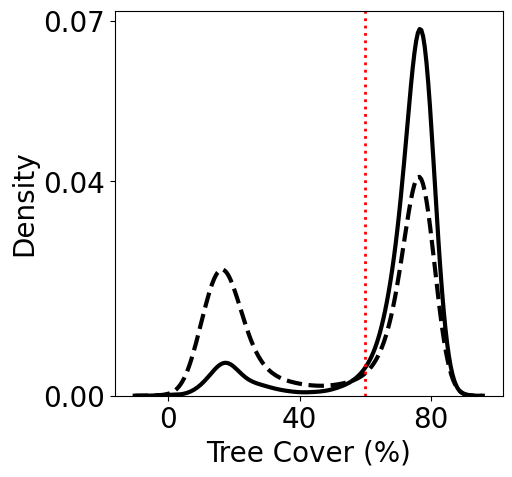

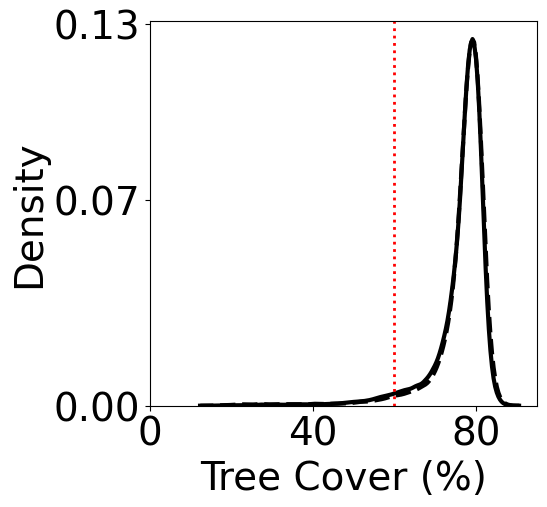

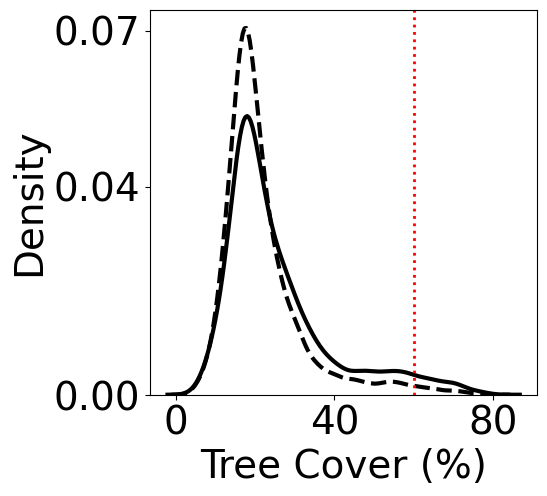

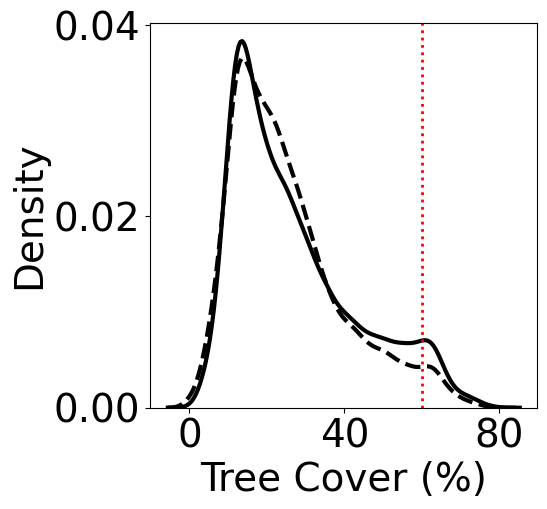

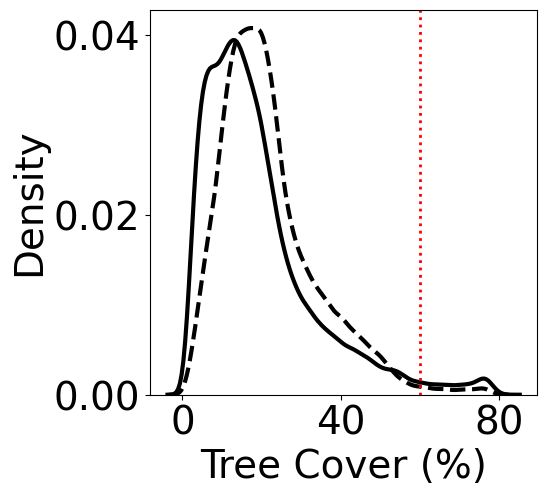

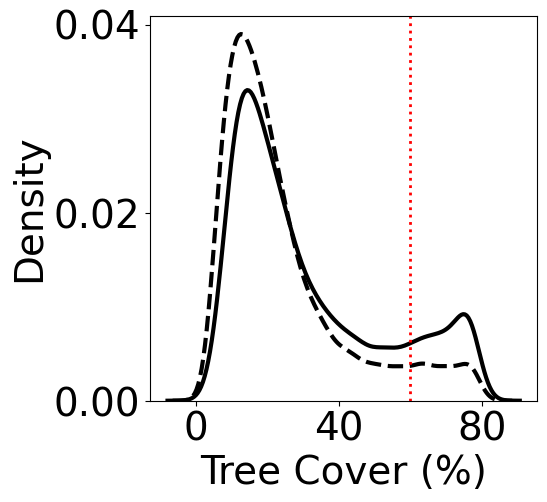

In [11]:
places = ['marajo','pmfb','bananal','pantanal','orinoco','moxos']
files = ['data/shapes/ilha_marajo.shp','data/shapes/PMFB.shp','data/shapes/bananal.shp',
         'data/shapes/pantanal.shp','data/shapes/llanos.shp','data/shapes/moxos.shp']

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.LON, df.LAT))

plotting.plot_stats_kde(gdf, places, files)

### Tree Cover Map with insets

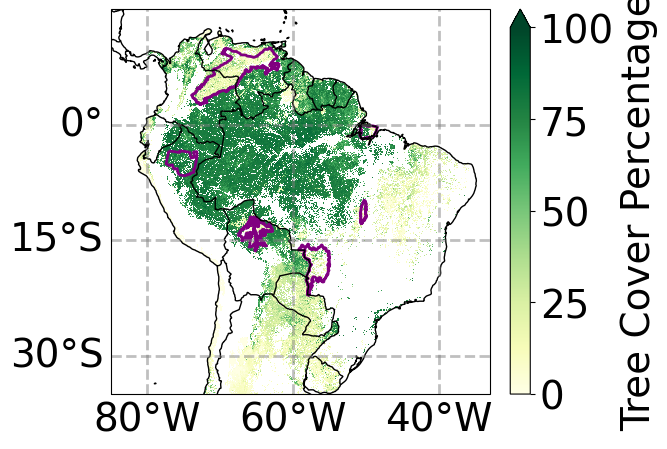

In [12]:
tree_path = "data/SouthAmerica_TreeCover_Mattos2023.nc"
elev_path = "data/SouthAmerica_Elevation_Mattos2023.nc"
pp_path = "data/SouthAmerica_Precipitation_Mattos2023.nc"
count_path = "data/SouthAmerica_TreeCount_Mattos2023.nc"
sev_path = "data/SouthAmerica_SEV_Mattos2023.nc"

plotting.plot_map(
    tree_path,
    "TC",
    "tree_cover_map.png",
    mask=True,
    elev_path=elev_path,
    pp_path=pp_path,
    tree_path=tree_path,
    count_path=count_path,
    extent=[-85, -33, -35, 15],
    plot_shapes=True,
    shape_list = [
    "data/shapes/PMFB.shp",
    "data/shapes/ilha_marajo.shp",
    "data/shapes/bananal.shp",
    "data/shapes/moxos.shp",
    "data/shapes/llanos.shp",
    "data/shapes/pantanal.shp",
],
    dpi=300,
    cmap="YlGn",
    vmin = 0,
    vmax = 100
)

### Climatology plots

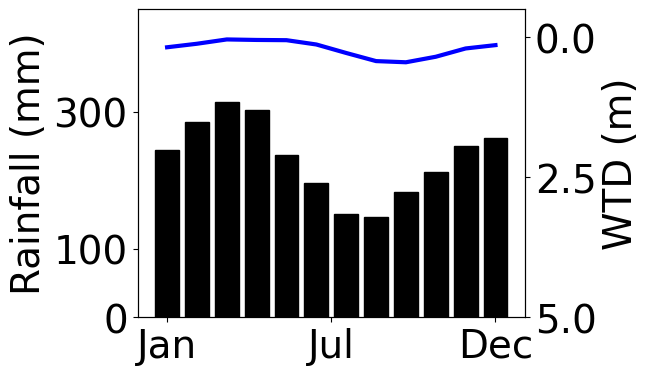

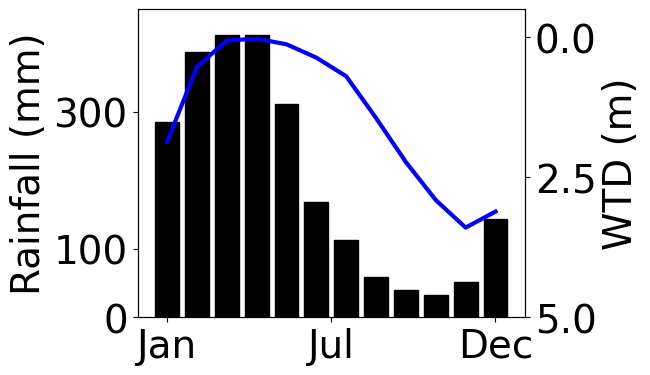

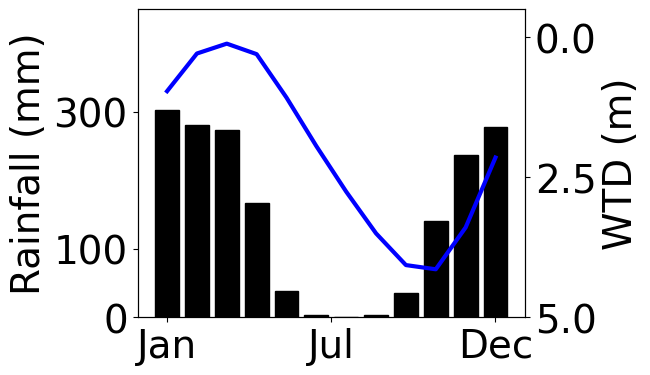

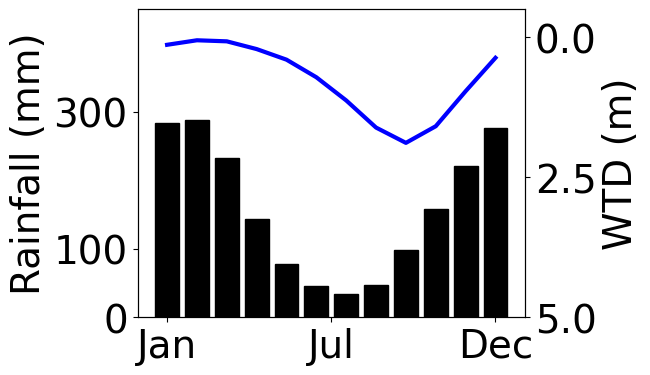

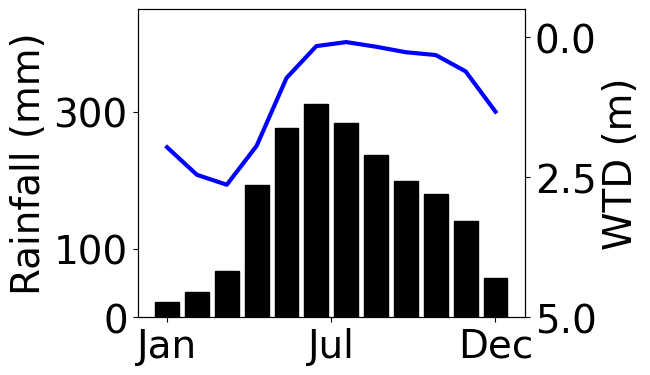

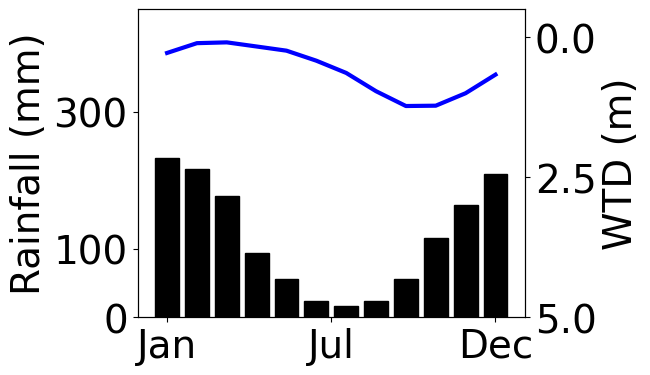

In [13]:
df = pd.read_parquet("data/data_mattos2023_pnas_2.parquet")
plotting.plot_climatology(df)

## Figure 4

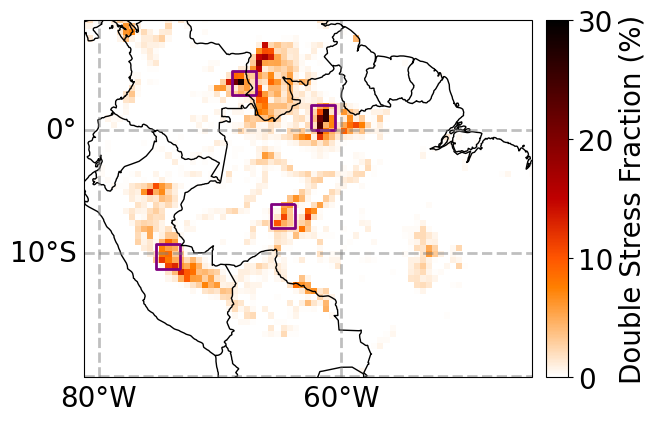

In [15]:
mask = xarray.open_dataset("data/SouthAmerica_FutureMask_Mattos2023.nc")
mask = mask.astype(bool)
ds_tc = xarray.open_dataset("data/SouthAmerica_TreeCover2km_Mattos2023.nc")
_ = plotting.plot_upscaled_mask(mask.mask,ds_tc.lat.values,resolution_factor=30)

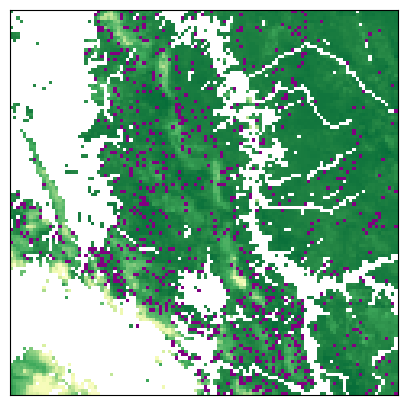

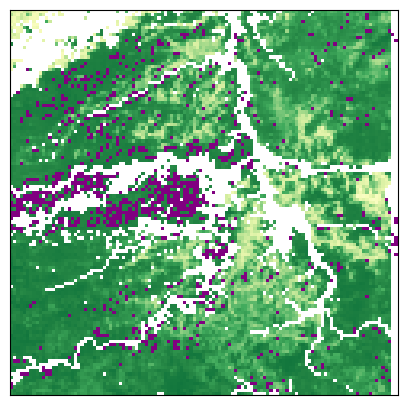

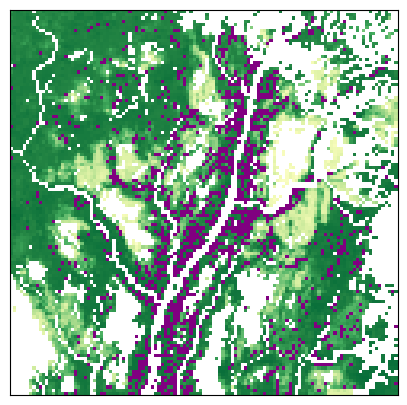

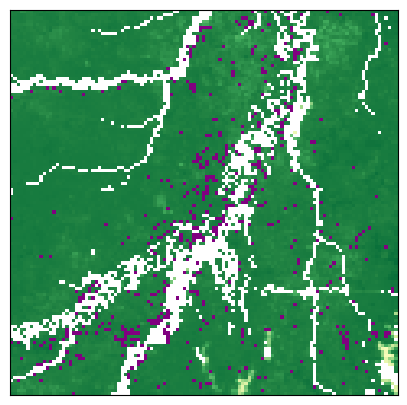

In [16]:
shapes = ["data/shapes/pmfb_bb.shp","data/shapes/upper_bb.shp","data/shapes/roraima_bb.shp","data/shapes/madeira_bb.shp"]
tree_path = "data/SouthAmerica_TreeCover2km_Mattos2023.nc"
count_path = "data/SouthAmerica_TreeCount2km_Mattos2023.nc"

for path in shapes:
    plotting.plot_tree_cover_mask(tree_path,mask.mask,count_path,path)